<a href="https://colab.research.google.com/github/piyusam0133/LSTM/blob/main/neuralproject_mlflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Data set:
 Individual household electric power consumption dataset collected via submeters placed in 3 distinct areas of a home

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#load dataset
df = pd.read_csv("/content/Household_power_consumption.csv")

#Find the missing value
According to dataset say: The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [ ]:
df.isnull().sum()

,0
datetime,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,1
Sub_metering_3,1
sub_metering_4,1


In [ ]:

# Replace '?' with NaN
df.replace("?", pd.NA, inplace=True)

# Check for missing values in each column
print(df.isnull().sum())


datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           1
dtype: int64


In [ ]:
#print dataset
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...
166318,2007-04-11 05:22:00,0.302,0.106,240.81,1.2,0.0,1.0,0.0,4.033333
166319,2007-04-11 05:23:00,0.300,0.104,240.26,1.2,0.0,1.0,0.0,4.000000
166320,2007-04-11 05:24:00,0.300,0.104,240.38,1.2,0.0,2.0,0.0,3.000000
166321,2007-04-11 05:25:00,0.302,0.104,240.52,1.2,0.0,1.0,0.0,4.033333


#Handle missing value


In [ ]:
# Convert numerical columns safely
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert to float and handle missing values
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert while forcing errors to NaN
    df[col].fillna(df[col].median(), inplace=True)  # Fill NaN with median values

<ipython-input-55-78da26d715a4>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill NaN with median values


In [ ]:
df

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...
166318,2007-04-11 05:22:00,0.302,0.106,240.81,1.2,0.0,1.0,0.0,4.033333
166319,2007-04-11 05:23:00,0.300,0.104,240.26,1.2,0.0,1.0,0.0,4.000000
166320,2007-04-11 05:24:00,0.300,0.104,240.38,1.2,0.0,2.0,0.0,3.000000
166321,2007-04-11 05:25:00,0.302,0.104,240.52,1.2,0.0,1.0,0.0,4.033333


#Study the dataset features

Data Description:Attribute Information

In [ ]:
#global_active_power: household global minute-averaged active power (in kilowatt)
df["Global_active_power"].value_counts()

,count
Global_active_power,
0.216,1863
0.218,1845
0.220,1502
0.222,1348
0.214,1338
...,...
5.240,1
6.166,1
7.132,1


In [ ]:
#global_reactive_power: household global minute-averaged reactive power (in kilowatt)
df["Global_reactive_power"].value_counts()

,count
Global_reactive_power,
0.000,46934
0.114,1784
0.106,1776
0.108,1767
0.100,1725
...,...
0.832,1
0.842,1
0.822,1


In [ ]:
#voltage: minute-averaged voltage (in volt)
df["Voltage"].value_counts()

,count
Voltage,
241.53,271
241.47,266
241.21,265
241.78,263
241.41,262
...,...
226.53,1
227.05,1
228.71,1


In [ ]:
#global_intensity: household global minute-averaged current intensity (in ampere)
df["Global_intensity"].value_counts()

,count
Global_intensity,
1.4,15658
1.0,12217
1.2,9857
1.8,6887
0.8,6438
...,...
36.6,1
37.0,1
38.8,1


In [ ]:
#sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
df["Sub_metering_1"].value_counts()

,count
Sub_metering_1,
0.0,152234
1.0,6659
38.0,1589
2.0,1554
37.0,1507
...,...
56.0,1
64.0,1
62.0,1


In [ ]:
#sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
df["Sub_metering_2"].value_counts()

,count
Sub_metering_2,
0.0,117425
1.0,26774
2.0,12008
37.0,1022
36.0,943
...,...
48.0,3
53.0,3
76.0,2


In [ ]:
#sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.
df["Sub_metering_3"].value_counts()

,count
Sub_metering_3,
0.0,100349
18.0,32221
17.0,29157
16.0,1950
19.0,1924
9.0,64
15.0,58
4.0,58
1.0,53


# Convert date and time

In [ ]:
df = df.reset_index()  # Moves the index back into a column
print(df.columns)  # See if 'datetime' exists
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df.set_index("datetime", inplace=True)
print(df.index)



Index(['index', 'datetime', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')
DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2008-05-09 03:03:00', '2008-05-09 03:04:00',
               '2008-05-09 03:05:00', '2008-05-09 03:06:00',
               '2008-05-09 03:07:00', '2008-05-09 03:08:00',
               '2008-05-09 03:09:00', '2008-05-09 03:10:00',
               '2008-05-09 03:11:00', '2008-05-09 03:12:00'],
              dtype='datetime64[ns]', name='datetime', length=733549, freq=None)


In [ ]:
df

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...,...
2007-04-11 05:22:00,166318,0.302,0.106,240.81,1.2,0.0,1.0,0.0,4.033333
2007-04-11 05:23:00,166319,0.300,0.104,240.26,1.2,0.0,1.0,0.0,4.000000
2007-04-11 05:24:00,166320,0.300,0.104,240.38,1.2,0.0,2.0,0.0,3.000000


In [ ]:
print(df.columns)  # Check all column names

Index(['index', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')


#Normalized Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[cols_to_convert] = scaler.fit_transform(df[cols_to_convert])


#Convert data to Numerical

In [ ]:
df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)


<ipython-input-58-6e3acd2cba44>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'datetime
2006-12-16 17:24:00         0.0
2006-12-16 17:25:00         1.0
2006-12-16 17:26:00         2.0
2006-12-16 17:27:00         3.0
2006-12-16 17:28:00         4.0
                         ...   
2008-05-09 03:08:00    733544.0
2008-05-09 03:09:00    733545.0
2008-05-09 03:10:00    733546.0
2008-05-09 03:11:00    733547.0
2008-05-09 03:12:00    733548.0
Name: index, Length: 733549, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, :-1] = df.iloc[:, :-1].astype(float)


#Feature Engineering: Aggregate Hourly Data
Since predicting minute-level data is too noisy, we aggregate data into hourly averages.

In [ ]:
df_hourly = df.resample('h').mean()


In [ ]:
df_hourly.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,,
2006-12-16 17:00:00,17.5,0.391093,0.164748,0.389315,0.384783,0.0,0.006766,0.543907,52.992593
2006-12-16 18:00:00,65.5,0.335304,0.057578,0.387091,0.330435,0.0,0.086111,0.544086,36.953333
2006-12-16 19:00:00,125.5,0.313396,0.061319,0.340052,0.306594,0.0,0.018376,0.538172,38.553889
2006-12-16 20:00:00,185.5,0.300960,0.054029,0.369337,0.293841,0.0,0.000000,0.541398,37.692778
2006-12-16 21:00:00,245.5,0.280928,0.055156,0.477091,0.274928,0.0,0.005342,0.555376,33.307778


In [ ]:
df_hourly.shape

(12227, 9)

#Feature Selection

In [ ]:
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

target = 'Global_active_power'


In [ ]:
df_hourly

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,,
2006-12-16 17:00:00,17.5,0.473764,0.286250,0.251597,0.477901,0.0,0.007230,0.843056,52.992593
2006-12-16 18:00:00,65.5,0.404304,0.100042,0.248801,0.408840,0.0,0.092009,0.843333,36.953333
2006-12-16 19:00:00,125.5,0.377026,0.106542,0.189667,0.378545,0.0,0.019635,0.834167,38.553889
2006-12-16 20:00:00,185.5,0.361544,0.093875,0.226481,0.362339,0.0,0.000000,0.839167,37.692778
2006-12-16 21:00:00,245.5,0.336602,0.095833,0.361942,0.338306,0.0,0.005708,0.860833,33.307778
...,...,...,...,...,...,...,...,...,...
2006-12-28 01:00:00,16325.5,0.009846,0.140917,0.719263,0.012891,0.0,0.000913,0.000000,4.562222
2006-12-28 02:00:00,16385.5,0.014366,0.228792,0.869402,0.018600,0.0,0.007078,0.000000,4.752778
2006-12-28 03:00:00,16445.5,0.012324,0.186875,0.890354,0.015101,0.0,0.000000,0.000000,4.980000


In [ ]:
scaler = MinMaxScaler()
df_hourly[features] = scaler.fit_transform(df_hourly[features])


In [ ]:
df_hourly

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,,
2006-12-16 17:00:00,17.5,0.642436,0.328524,0.359450,0.633704,0.0,0.011366,0.854448,52.992593
2006-12-16 18:00:00,65.5,0.549520,0.093202,0.356849,0.543037,0.0,0.144652,0.854730,36.953333
2006-12-16 19:00:00,125.5,0.513032,0.101416,0.301861,0.503264,0.0,0.030869,0.845439,38.553889
2006-12-16 20:00:00,185.5,0.492321,0.085409,0.336094,0.481987,0.0,0.000000,0.850507,37.692778
2006-12-16 21:00:00,245.5,0.458958,0.087884,0.462060,0.450435,0.0,0.008973,0.872466,33.307778
...,...,...,...,...,...,...,...,...,...
2008-05-08 23:00:00,733325.5,0.314384,0.309252,0.672515,0.297268,0.0,0.000000,0.864865,18.556111
2008-05-09 00:00:00,733385.5,0.097882,0.342847,0.758174,0.093569,0.0,0.010050,0.085304,10.533333
2008-05-09 01:00:00,733445.5,0.040977,0.260702,0.665456,0.040861,0.0,0.009332,0.033784,5.553889


# Prepare Data for LSTM model

Create Sequential Data

In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(df_hourly[features].values, seq_length)


Split into Train & Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
y_test

array([0.4148669 , 0.27863506, 0.23223696, ..., 0.04097652, 0.046482  ,
       0.03187694])

Define the LSTM Model

In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, len(features))),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile & Train the Model

In [ ]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - loss: 0.0227 - val_loss: 0.0131
Epoch 2/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0145 - val_loss: 0.0109
Epoch 3/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0123 - val_loss: 0.0103
Epoch 4/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0112 - val_loss: 0.0098
Epoch 5/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - loss: 0.0109 - val_loss: 0.0095
Epoch 6/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 7/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 8/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 9/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0100 - val_loss: 0.0090
Epoch 10/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0103 - val_loss: 0.0089
Epoch 11/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 12/50
306/306 ━━━━━━━━━━━━━━

#Evaluate the Model

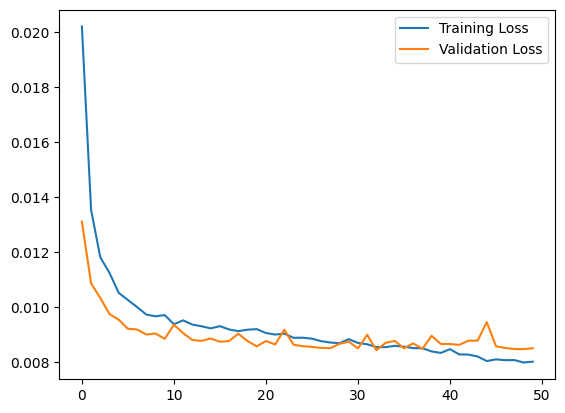

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


#Evaluate model for testing data

In [ ]:
# Get model predictions
y_pred = model.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Mean Absolute Error (MAE): 0.0612
Mean Squared Error (MSE): 0.0085
Root Mean Squared Error (RMSE): 0.0923
R² Score: 0.6216


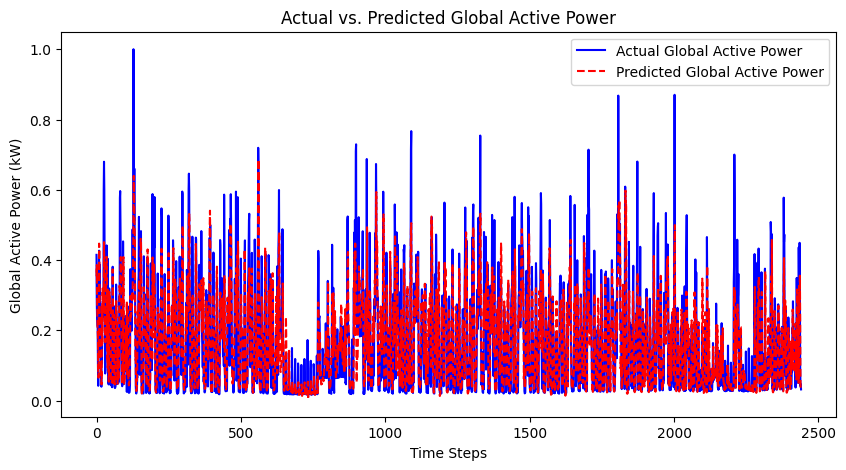

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Global Active Power", color='blue')
plt.plot(y_pred, label="Predicted Global Active Power", color='red', linestyle='dashed')
plt.legend()
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power (kW)")
plt.title("Actual vs. Predicted Global Active Power")
plt.show()



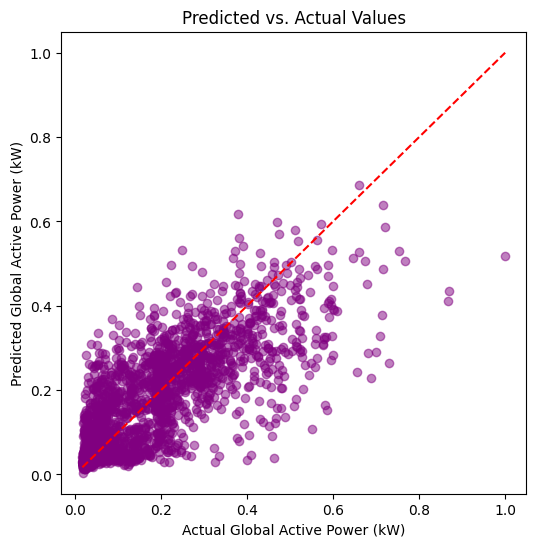

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Reference line
plt.xlabel("Actual Global Active Power (kW)")
plt.ylabel("Predicted Global Active Power (kW)")
plt.title("Predicted vs. Actual Values")
plt.show()



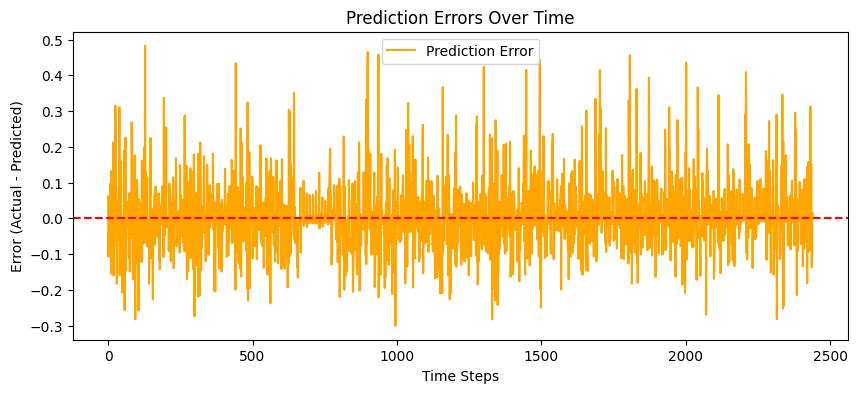

In [ ]:
errors = y_test - y_pred.flatten()

plt.figure(figsize=(10, 4))
plt.plot(errors, label="Prediction Error", color='orange')
plt.axhline(y=0, color="red", linestyle="--")  # Reference zero-error line
plt.xlabel("Time Steps")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Prediction Errors Over Time")
plt.legend()
plt.show()


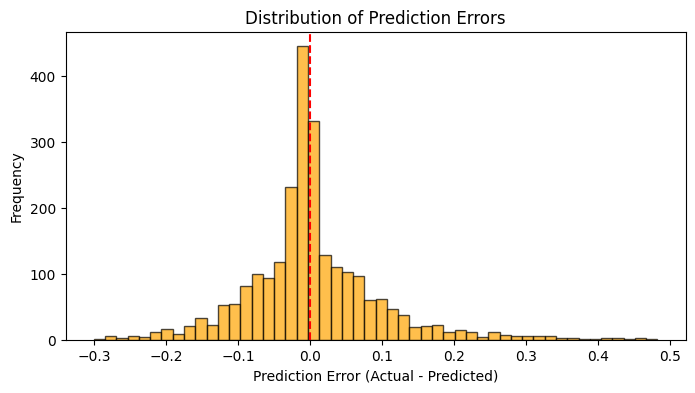

In [ ]:
# Assuming 'errors' is your list or array of prediction errors
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=50, color="orange", alpha=0.7, edgecolor="black")
plt.axvline(x=0, color="red", linestyle="dashed")  # Reference line at zero
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


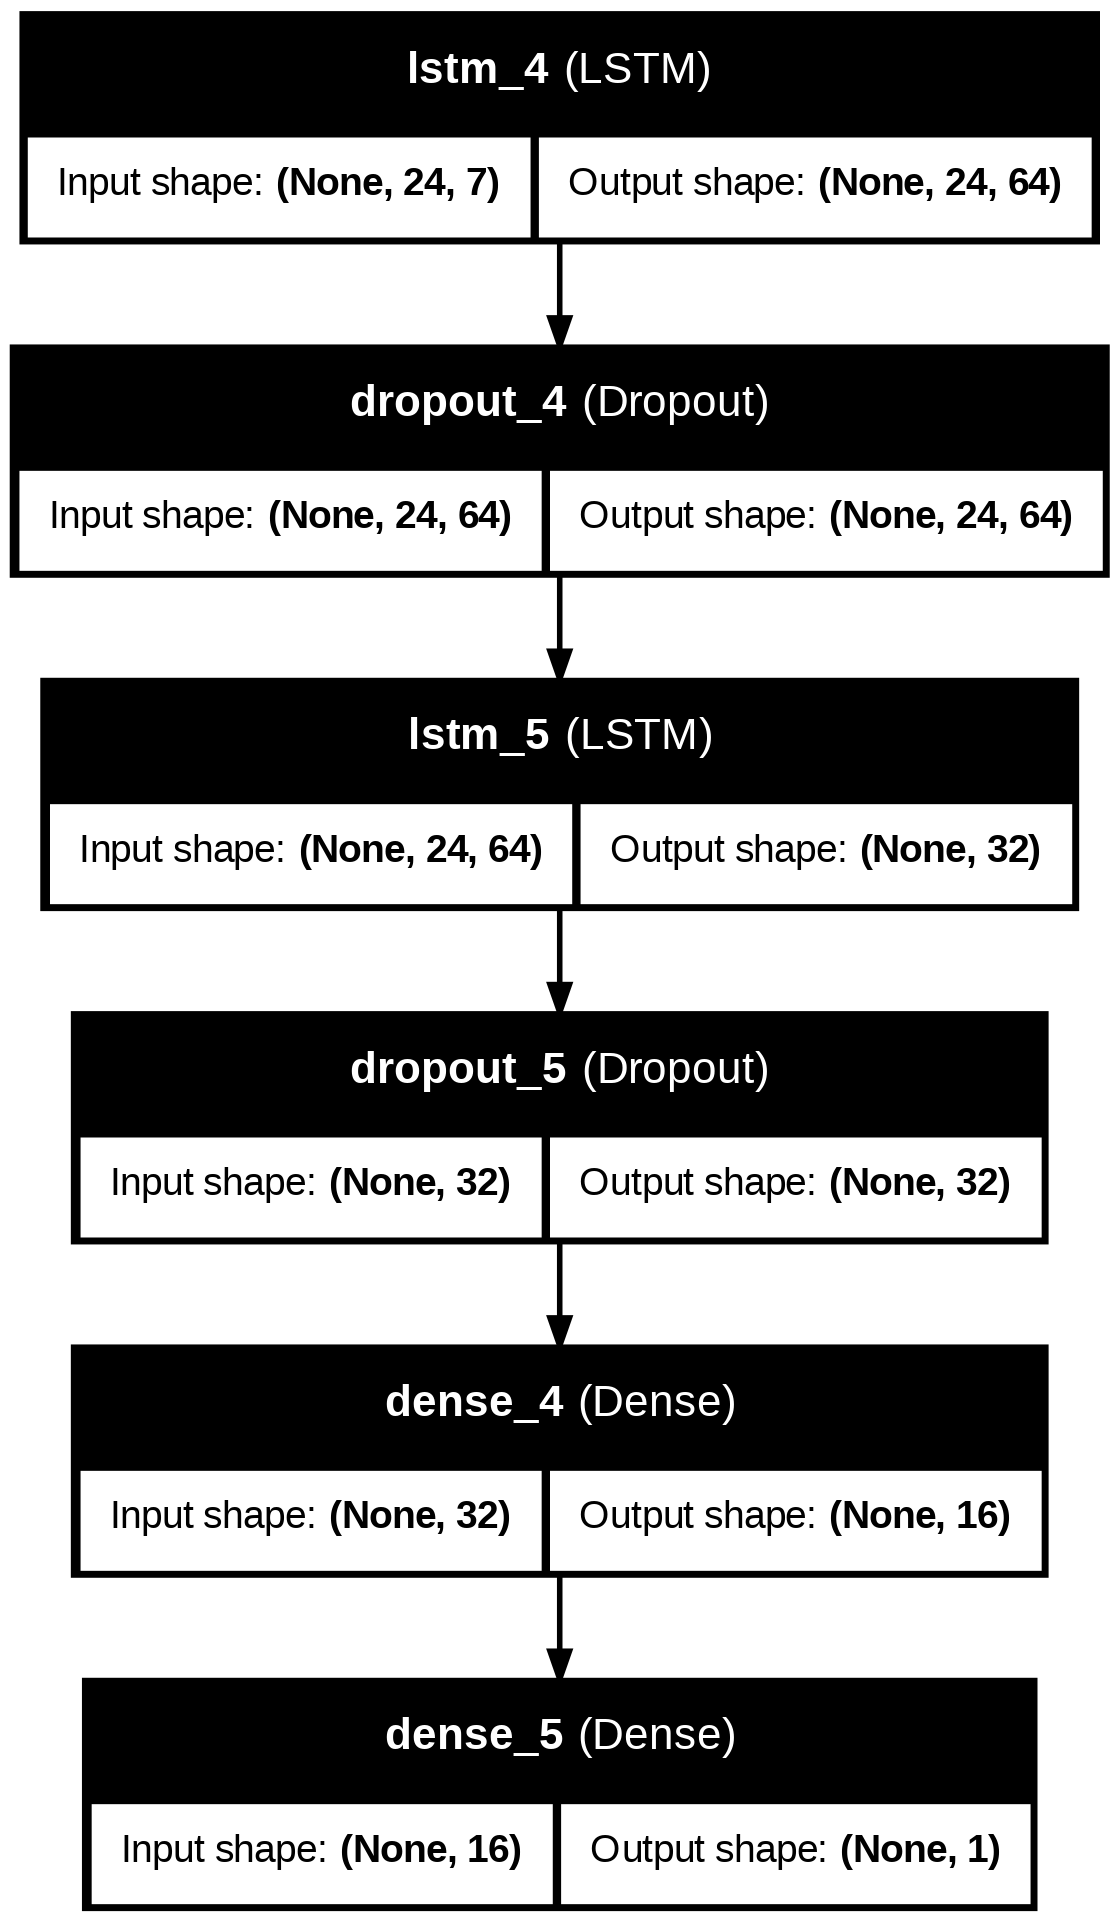

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.save('power_consumption_forecast.keras')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("power_consumption_forecast.keras")#inferencing
y_pred=model.predict(X_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


#Detecting Inefficiency

Define an Efficiency Threshold

In [ ]:

efficiency_labels = []
for i in range(len(y_test)):
    actual = y_test[i]
    predicted = y_pred[i][0]


# Displaying results
for i in range(10):  # Show first 10 results
    print(f"Actual: {y_test[i]:.4f}, Predicted: {y_pred[i][0]:.4f}")



Actual: 0.4149, Predicted: 0.3540
Actual: 0.2786, Predicted: 0.3858
Actual: 0.2322, Predicted: 0.2882
Actual: 0.2125, Predicted: 0.2435
Actual: 0.2089, Predicted: 0.1989
Actual: 0.1003, Predicted: 0.1818
Actual: 0.0422, Predicted: 0.0817
Actual: 0.1615, Predicted: 0.0653
Actual: 0.3781, Predicted: 0.3088
Actual: 0.4267, Predicted: 0.4468


In [ ]:
df_hourly

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,,
2006-12-16 17:00:00,17.5,0.650159,0.375233,0.264248,0.640594,0.0,0.013178,0.897663,52.992593
2006-12-16 18:00:00,65.5,0.553640,0.106453,0.261262,0.547031,0.0,0.167707,0.897959,36.953333
2006-12-16 19:00:00,125.5,0.515736,0.115836,0.198100,0.505988,0.0,0.035789,0.888199,38.553889
2006-12-16 20:00:00,185.5,0.494221,0.097552,0.237422,0.484032,0.0,0.000000,0.893523,37.692778
2006-12-16 21:00:00,245.5,0.459563,0.100379,0.382109,0.451472,0.0,0.010404,0.916593,33.307778
...,...,...,...,...,...,...,...,...,...
2007-04-11 01:00:00,166085.5,0.139126,0.247309,0.577452,0.132735,0.0,0.035372,0.664596,4.357222
2007-04-11 02:00:00,166145.5,0.023421,0.363024,0.567477,0.030689,0.0,0.035372,0.000000,5.038889
2007-04-11 03:00:00,166205.5,0.016781,0.264931,0.583459,0.020459,0.0,0.034956,0.000000,4.378333


Display Sample Predictions


In [ ]:
from tensorflow.keras.models import load_model

scaler = MinMaxScaler()
scaler.fit(df_hourly[["Global_active_power", "Global_reactive_power", "Voltage",
                      "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]])

def get_user_input():
    print("Enter household power usage values for the current time step:")

    user_data = [
        float(input("Global Active Power (kW): ")),
        float(input("Global Reactive Power (kW): ")),
        float(input("Voltage (V): ")),
        float(input("Global Intensity (A): ")),
        float(input("Sub Metering 1 (Wh): ")),
        float(input("Sub Metering 2 (Wh): ")),
        float(input("Sub Metering 3 (Wh): "))
    ]

    return np.array(user_data).reshape(1, -1)

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)

last_24_values = df_hourly.tail(24)[["Global_active_power", "Global_reactive_power", "Voltage",
                                     "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].values

last_24_values_scaled = scaler.transform(last_24_values)
X_input = np.concatenate([last_24_values_scaled, user_input_scaled], axis=0)

X_input_scaled = X_input.reshape(1, 25, 7)

model = load_model("power_consumption_forecast.keras")
y_pred = model.predict(X_input_scaled)[0][0]

actual_value = user_input[0][0]

threshold = 0.2

if actual_value > y_pred + threshold:
    print(f"Actual: {actual_value:.4f} kW, Predicted: {y_pred:.4f} kW → **Inefficient (Overuse)**")
else:
    print(f"Actual: {actual_value:.4f} kW, Predicted: {y_pred:.4f} kW → **Efficient**")


Enter household power usage values for the current time step:
Global Active Power (kW): 1
Global Reactive Power (kW): 1
Voltage (V): 1
Global Intensity (A): 1
Sub Metering 1 (Wh): 1
Sub Metering 2 (Wh): 1
Sub Metering 3 (Wh): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Actual: 1.0000 kW, Predicted: 0.0877 kW → **Inefficient (Overuse)**


In [ ]:
!pip install mlflow
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
import mlflow
import mlflow.keras
import subprocess
from pyngrok import ngrok, conf
import getpass


MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

mlflow.set_experiment("Energy_Usage_Prediction")

# ngrok setup
print("Enter your ngrok auth token (you can copy it from https://dashboard.ngrok.com/auth)")
conf.get_default().auth_token = getpass.getpass()
port = 5000
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel '{public_url}' -> 'http://127.0.0.1:{port}'")

# Import required libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define and train the model within an MLFlow run
with mlflow.start_run() as run:
    # Log details about the dataset and preprocessing
    print(f"MLFlow Run ID: {run.info.run_id}")
    mlflow.log_param("Dataset", "household_power_consumption.csv")
    mlflow.log_param("Scaler", "MinMaxScaler")

    # Reshape data before applying MinMaxScaler
    X_train_reshaped = X_train.reshape((X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
    X_test_reshaped = X_test.reshape((X_test.shape[0] * X_test.shape[1], X_test.shape[2]))

    # Apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_reshaped)
    X_test_scaled = scaler.transform(X_test_reshaped)

    X_train_scaled = X_train_scaled.reshape(X_train.shape)
    X_test_scaled = X_test_scaled.reshape(X_test.shape)

    # Model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer="adam", loss="mse")

    mlflow.log_param("LSTM Layers", 2)
    mlflow.log_param("Dropout Rate", 0.2)
    mlflow.log_param("Optimizer", "Adam")
    mlflow.log_param("Loss Function", "MSE")

    history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_test_scaled, y_test), verbose=1)

    # Log metrics
    mlflow.log_metric("Final Training Loss", history.history['loss'][-1])
    mlflow.log_metric("Final Validation Loss", history.history['val_loss'][-1])

    # Log the Keras model
    mlflow.keras.log_model(model, "LSTM_Energy_Model")

    model_uri = f"runs:/{run.info.run_id}/LSTM_Energy_Model"
    mlflow.register_model(model_uri, "Energy_Usage_LSTM_Model")

    print("MLFlow Run Complete. Check the MLFlow UI for details.")


2025/02/26 18:59:38 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/02/26 18:59:38 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

Enter your ngrok auth token (you can copy it from https://dashboard.ngrok.com/auth)
··········
 * ngrok tunnel 'https://5b8f-34-125-124-36.ngrok-free.app' -> 'http://127.0.0.1:5000'
MLFlow Run ID: 0cf8877fdd304ed0b68c5627ce030f6c
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - loss: 0.0234 - val_loss: 0.0128
Epoch 2/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - loss: 0.0140 - val_loss: 0.0109
Epoch 3/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0126 - val_loss: 0.0101
Epoch 4/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0115 - val_loss: 0.0099
Epoch 5/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.0110 - val_loss: 0.0097
Epoch 6/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 7/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 8/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - loss: 0.0105 - val_loss: 0.0094
Epoch 9/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 10/10
306/306 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.0101 - val_loss: 0.0097


2025/02/26 19:01:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/02/26 19:01:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLFlow Run Complete. Check the MLFlow UI for details.


Successfully registered model 'Energy_Usage_LSTM_Model'.
Created version '1' of model 'Energy_Usage_LSTM_Model'.
